In [1]:
# Load a local copy of the current ODYM branch:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
#from seaborn.palettes import color_palette
import xlrd
import pylab
from copy import deepcopy
import logging as log
from xlrd.biffh import BIFF_FIRST_UNICODE
import xlwt
from scipy.stats import norm
from cycler import cycler
#import seaborn as sns
import dynamic_stock_model as dsm
import product_component_model as pcm

In [2]:
# Loading data
path = os.getcwd()
data = pd.read_csv(path+"/old_model/dummy_data_battery.csv", header=0 , sep=',')
# This is just to replace all the void values in "data" by 0, which makes things easier
data.fillna(0, inplace=True)

# We store the time and inflows values in two lists
time = data['Time'].to_numpy()
stock_cars = data['Population'].to_numpy() # FIXME: Is he stock just labeled wrongly as population or is it intended this way?
years = len(time)

\\home.ansatt.ntnu.no\romainb\Documents\6. Papers\7. Battery replacement modeling paper\Battery_replacements\product_component_model.py:616: RuntimeWarning: invalid value encountered in true_divide
  self.oc_cm[m, 0:m] = (self.sc_pr[m-1, 0:m] - self.oc_pr[m, 0:m])/self.sf_cm[m-1,0:m] * abs((self.sf_cm[m, 0:m] - self.sf_cm[m-1, 0:m]))# Calculating outflows attributed to component failures
\\home.ansatt.ntnu.no\romainb\Documents\6. Papers\7. Battery replacement modeling paper\Battery_replacements\product_component_model.py:683: RuntimeWarning: invalid value encountered in true_divide
  self.oc_cm[m, 0:m] = self.sc_cm[m-1, 0:m]/self.sf_cm[m-1,0:m] * abs((self.sf_cm[m, 0:m] - self.sf_cm[m-1, 0:m]))# FIXME: Truedev gives a warning for some values, TODO: Double-check if use of sc_cm is correct here rather than sc_pr
\\home.ansatt.ntnu.no\romainb\Documents\6. Papers\7. Battery replacement modeling paper\Battery_replacements\product_component_model.py:770: RuntimeWarning: overflow encountered 

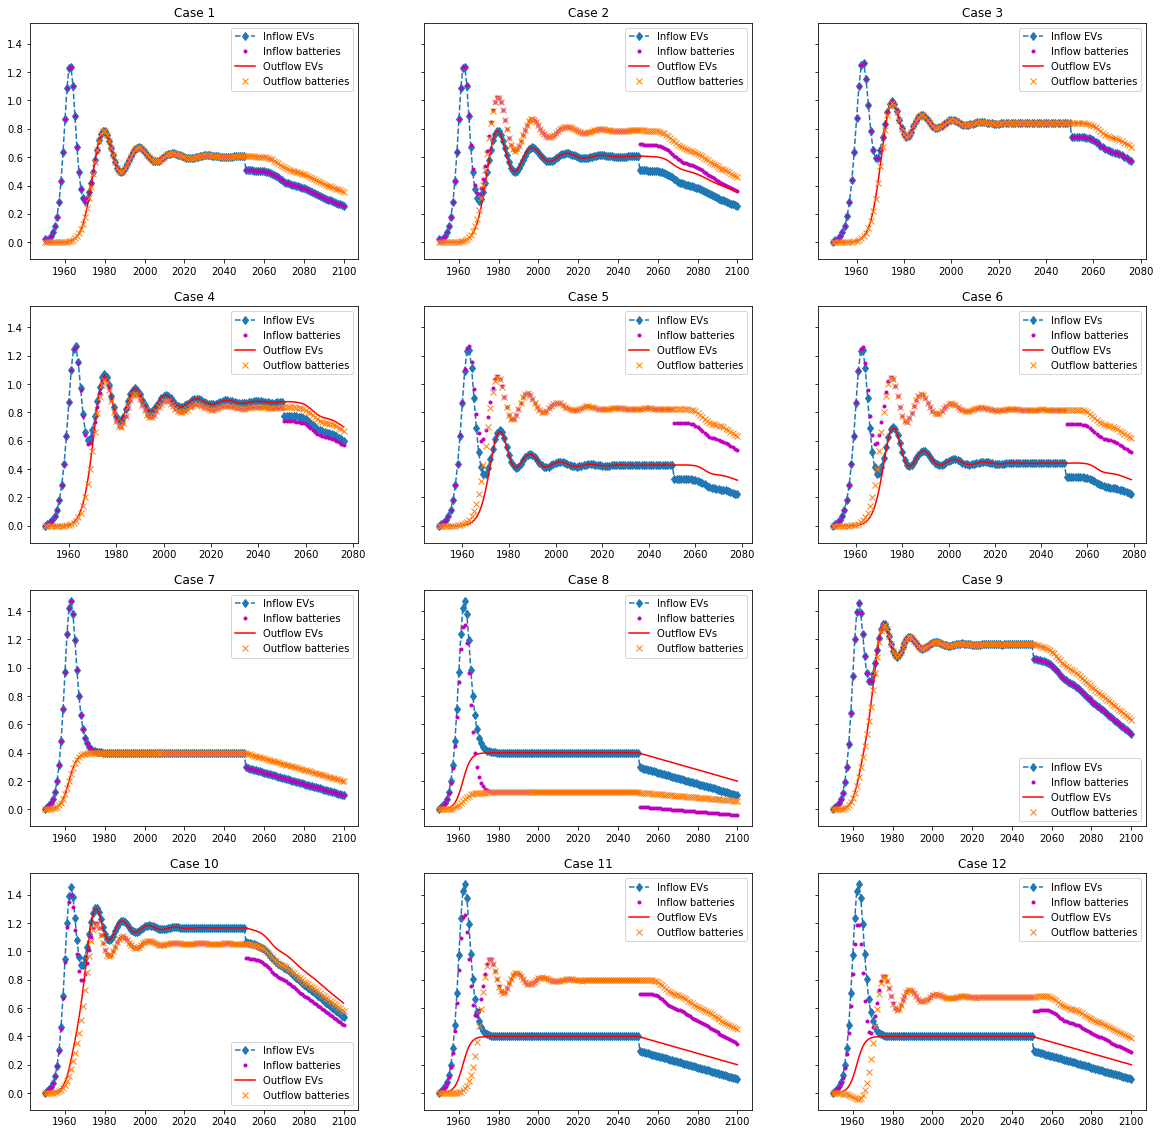

In [4]:
fig, axs = plt.subplots(4, 3, figsize=(20,20), sharey=True)
Model = pcm.ProductComponentModel(t=time, s_pr=stock_cars, lt_cm={'Type': 'Normal', 'Mean':np.array([12]), 'StdDev': np.array([3])}, lt_pr={'Type': 'Normal', 'Mean':np.array([16]), 'StdDev': np.array([4])}, d=0.04, r=0.3, tau_cm=3, tau_pr=3)
# Case 1
Model.case_1()
axs[0, 0].plot(time, Model.i_pr, 'd--', label='Inflow EVs')
axs[0, 0].plot(time, Model.i_cm, 'm.', label='Inflow batteries')
axs[0, 0].plot(time, Model.oc_pr.sum(axis=1),'r', label='Outflow EVs')
axs[0, 0].plot(time, Model.oc_cm.sum(axis=1),'x', label='Outflow batteries')
axs[0, 0].set_title('Case 1')
axs[0, 0].legend(loc='best')

# Case 2
Model.case_2()

axs[0, 1].plot(time, Model.i_pr, 'd--', label='Inflow EVs')
axs[0, 1].plot(time, Model.i_cm, 'm.', label='Inflow batteries')
axs[0, 1].plot(time, Model.oc_pr.sum(axis=1),'r', label='Outflow EVs')
axs[0, 1].plot(time, Model.oc_cm.sum(axis=1),'x', label='Outflow batteries')
axs[0, 1].set_title('Case 2')
axs[0, 1].legend(loc='best')

# Case 3
Model.case_3()

axs[0, 2].plot(time, Model.i_pr, 'd--', label='Inflow EVs')
axs[0, 2].plot(time, Model.i_cm, 'm.', label='Inflow batteries')
axs[0, 2].plot(time, Model.oc_pr.sum(axis=1),'r', label='Outflow EVs')
axs[0, 2].plot(time, Model.oc_cm.sum(axis=1),'x', label='Outflow batteries')
axs[0, 2].set_title('Case 3')
axs[0, 2].legend(loc='best')

# Case 4
Model = pcm.ProductComponentModel(t=time, s_pr=stock_cars, lt_cm={'Type': 'Normal', 'Mean':np.array([12]), 'StdDev': np.array([3])}, lt_pr={'Type': 'Normal', 'Mean':np.array([16]), 'StdDev': np.array([4])}, d=0.04, r=0.3, tau_cm=3, tau_pr=3)

Model.case_4()
axs[1, 0].plot(time, Model.i_pr, 'd--', label='Inflow EVs')
axs[1, 0].plot(time, Model.i_cm, 'm.', label='Inflow batteries')
axs[1, 0].plot(time, Model.oc_pr.sum(axis=1),'r', label='Outflow EVs')
axs[1, 0].plot(time, Model.oc_cm.sum(axis=1),'x', label='Outflow batteries')
axs[1, 0].set_title('Case 4')
axs[1, 0].legend(loc='best')

# Case 5
Model = pcm.ProductComponentModel(t=time, s_pr=stock_cars, lt_cm={'Type': 'Normal', 'Mean':np.array([12]), 'StdDev': np.array([3])}, lt_pr={'Type': 'Normal', 'Mean':np.array([16]), 'StdDev': np.array([4])}, d=0.04, r=0.3, tau_cm=3, tau_pr=3)

Model.case_5()
axs[1, 1].plot(time, Model.i_pr, 'd--', label='Inflow EVs')
axs[1, 1].plot(time, Model.i_cm, 'm.', label='Inflow batteries')
axs[1, 1].plot(time, Model.oc_pr.sum(axis=1),'r', label='Outflow EVs')
axs[1, 1].plot(time, Model.oc_cm.sum(axis=1),'x', label='Outflow batteries')
axs[1, 1].set_title('Case 5')
axs[1, 1].legend(loc='best')


# Case 6
Model = pcm.ProductComponentModel(t=time, s_pr=stock_cars, lt_cm={'Type': 'Normal', 'Mean':np.array([12]), 'StdDev': np.array([3])}, lt_pr={'Type': 'Normal', 'Mean':np.array([16]), 'StdDev': np.array([4])}, d=0.04, r=0.3, tau_cm=3, tau_pr=3)

Model.case_6()

axs[1, 2].plot(time, Model.i_pr, 'd--', label='Inflow EVs')
axs[1, 2].plot(time, Model.i_cm, 'm.', label='Inflow batteries')
axs[1, 2].plot(time, Model.oc_pr.sum(axis=1),'r', label='Outflow EVs')
axs[1, 2].plot(time, Model.oc_cm.sum(axis=1),'x', label='Outflow batteries')
axs[1, 2].set_title('Case 6')
axs[1, 2].legend(loc='best')


# Case 7a
Model = pcm.ProductComponentModel(t=time, s_pr=stock_cars, lt_cm={'Type': 'Normal', 'Mean':np.array([12]), 'StdDev': np.array([3])}, lt_pr={'Type': 'Normal', 'Mean':np.array([16]), 'StdDev': np.array([4])}, d=0.04, r=0.3, tau_cm=3, tau_pr=3)

Model.case_7()

axs[2, 0].plot(time, Model.i_pr, 'd--', label='Inflow EVs')
axs[2, 0].plot(time, Model.i_cm, 'm.', label='Inflow batteries')
axs[2, 0].plot(time, Model.o_pr,'r', label='Outflow EVs')
axs[2, 0].plot(time, Model.o_cm,'x', label='Outflow batteries')
axs[2, 0].set_title('Case 7')
axs[2, 0].legend(loc='best')


# Case 8a
Model = pcm.ProductComponentModel(t=time, s_pr=stock_cars, lt_cm={'Type': 'Normal', 'Mean':np.array([12]), 'StdDev': np.array([3])}, lt_pr={'Type': 'Normal', 'Mean':np.array([16]), 'StdDev': np.array([4])}, d=0.04, r=0.3, tau_cm=3, tau_pr=3)

Model.case_8()

axs[2, 1].plot(time, Model.i_pr, 'd--', label='Inflow EVs')
axs[2, 1].plot(time, Model.i_cm, 'm.', label='Inflow batteries')
axs[2, 1].plot(time, Model.o_pr,'r', label='Outflow EVs')
axs[2, 1].plot(time, Model.o_cm,'x', label='Outflow batteries')
axs[2, 1].set_title('Case 8')
axs[2, 1].legend(loc='best')

# Case 9
Model = pcm.ProductComponentModel(t=time, s_pr=stock_cars, lt_cm={'Type': 'Normal', 'Mean':np.array([12]), 'StdDev': np.array([3])}, lt_pr={'Type': 'Normal', 'Mean':np.array([16]), 'StdDev': np.array([4])}, d=0.04, r=0.3, tau_cm=3, tau_pr=3)

Model.case_9()

axs[2, 2].plot(time, Model.i_pr, 'd--', label='Inflow EVs')
axs[2, 2].plot(time, Model.i_cm, 'm.', label='Inflow batteries')
axs[2, 2].plot(time, Model.oc_pr.sum(axis=1),'r', label='Outflow EVs')
axs[2, 2].plot(time, Model.oc_cm.sum(axis=1),'x', label='Outflow batteries')
axs[2, 2].set_title('Case 9')
axs[2, 2].legend(loc='best')


# Case 10
Model = pcm.ProductComponentModel(t=time, s_pr=stock_cars, lt_cm={'Type': 'Normal', 'Mean':np.array([12]), 'StdDev': np.array([3])}, lt_pr={'Type': 'Normal', 'Mean':np.array([16]), 'StdDev': np.array([4])}, d=0.04, r=0.3, tau_cm=3, tau_pr=3)

Model.case_10()

axs[3, 0].plot(time, Model.i_pr, 'd--', label='Inflow EVs')
axs[3, 0].plot(time, Model.i_cm, 'm.', label='Inflow batteries')
axs[3, 0].plot(time, Model.oc_pr.sum(axis=1),'r', label='Outflow EVs')
axs[3, 0].plot(time, Model.oc_cm.sum(axis=1),'x', label='Outflow batteries')
axs[3, 0].set_title('Case 10')
axs[3, 0].legend(loc='best')


# Case 11
Model = pcm.ProductComponentModel(t=time, s_pr=stock_cars, lt_cm={'Type': 'Normal', 'Mean':np.array([12]), 'StdDev': np.array([3])}, lt_pr={'Type': 'Normal', 'Mean':np.array([16]), 'StdDev': np.array([4])}, d=0.04, r=0.3, tau_cm=3, tau_pr=3)

Model.case_11()

axs[3, 1].plot(time, Model.i_pr, 'd--', label='Inflow EVs')
axs[3, 1].plot(time, Model.i_cm, 'm.', label='Inflow batteries')
axs[3, 1].plot(time, Model.o_pr,'r', label='Outflow EVs')
axs[3, 1].plot(time, Model.oc_cm.sum(axis=1),'x', label='Outflow batteries')
axs[3, 1].set_title('Case 11')
axs[3, 1].legend(loc='best')


# Case 12
Model = pcm.ProductComponentModel(t=time, s_pr=stock_cars, lt_cm={'Type': 'Normal', 'Mean':np.array([12]), 'StdDev': np.array([3])}, lt_pr={'Type': 'Normal', 'Mean':np.array([16]), 'StdDev': np.array([4])}, d=0.04, r=0.3, tau_cm=3, tau_pr=3)

Model.case_12()

axs[3, 2].plot(time, Model.i_pr, 'd--', label='Inflow EVs')
axs[3, 2].plot(time, Model.i_cm, 'm.', label='Inflow batteries')
axs[3, 2].plot(time, Model.o_pr,'r', label='Outflow EVs')
axs[3, 2].plot(time, Model.oc_cm.sum(axis=1),'x', label='Outflow batteries')
axs[3, 2].set_title('Case 12')
axs[3, 2].legend(loc='best')


In [5]:
Model.case_3()


(array([[0.02472623, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.02472257, 0.0159788 , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.02471144, 0.01597644, 0.02624063, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [       nan,        nan,        nan, ...,        nan, 0.        ,
         0.        ],
        [       nan,        nan,        nan, ...,        nan,        nan,
         0.        ],
        [       nan,        nan,        nan, ...,        nan,        nan,
                nan]]),
 array([[0.02472623, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.02472257, 0.0159788 , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.02471144, 0.01597644, 0.02624063, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [       nan,        nan,        nan, ...,        nan, 0.        ,
         0.        ],
        [   

In [6]:
Model.check_stock_balance_pr()

array([-2.47262320e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  5.55111512e-17,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [7]:
Model.check_stock_balance_cm()

array([-2.47262320e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  5.55111512e-17,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [8]:
Model.check_stock_pr_cm()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [10]:
Model.s_pr

array([ 0.02472623,  0.04070138,  0.06692851,  0.10986943,  0.1798621 ,
        0.29312231,  0.47425873,  0.7585818 ,  1.19202922,  1.82425524,
        2.68941421,  3.77540669,  5.        ,  6.22459331,  7.31058579,
        8.17574476,  8.80797078,  9.2414182 ,  9.52574127,  9.70687769,
        9.8201379 ,  9.89013057,  9.93307149,  9.95929862,  9.97527377,
        9.98498818,  9.99088949,  9.99447221,  9.9966465 ,  9.99796573,
        9.99876605,  9.99925154,  9.99954602,  9.99972464,  9.99983299,
        9.9998987 ,  9.99993856,  9.99996273,  9.9999774 ,  9.99998629,
        9.99999168,  9.99999496,  9.99999694,  9.99999814,  9.99999887,
        9.99999932, 10.        , 10.        , 10.        , 10.        ,
       10.        , 10.        , 10.        , 10.        , 10.        ,
       10.        , 10.        , 10.        , 10.        , 10.        ,
       10.        , 10.        , 10.        , 10.        , 10.        ,
       10.        , 10.        , 10.        , 10.        , 10.  